In [1]:
#Created by Kacper Lasocha, Jagiellonian University, Institute of Physics 
#kacper.lasocha@doctoral.uj.edu.pl

import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Unfolding
A common problem in various physical analysis is how to determine a true, unknown distribution of a certain feature being given only observed distribution, which is subject to uncertainties and limited resolution. In this notebook we will focus on histograms. The bins of an original, unknown histogram will be called **causes** and we shall speak about the probability of **cause i**: $P(C_{i})$. Alternatively, bins of an observation histogram will be called **effects**, and our starting point will be the knowledge of the **effect distribution**: $P(E_{j})$. The sets of causes and effect are often identic, but it is not always a case. We may consider completely different sets of causes and effects. We shall start however with a simple case of:

$$ C_{i} = E_{i} : \ signal \in [i; i+1) $$
$$ C_{0} = E_{0} : \ signal < 1 $$
$$ C_{99} = E_{99} : \ signal > 99 $$

In [2]:
def get_signal(lam1 = 30, lam2 = 60, s = 1):
    
    choice = np.random.choice([0,1], size = s)
    signal = choice * np.random.normal(loc=lam1, scale = 8, size = s) + (1-choice) * np.random.normal(loc=lam2, scale = 5, size = s)
    return np.maximum(0,signal)

def blur(signal):
    return signal + np.random.normal(size = len(signal))*np.sqrt(signal)

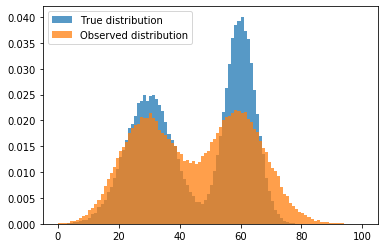

In [3]:
sample_size = 100000
x_size = 100
data = get_signal(s = sample_size)
x = np.arange(x_size+1)

true_dist, _, _ = plt.hist(data, bins = x, alpha = 0.75, label = "True distribution", density= True)

observed_data = blur(data)

observed_dist, _, _ = plt.hist(observed_data, bins = x, alpha = 0.75, label = "Observed distribution", density= True)

plt.legend()
plt.show()

# Response matrix
For our analysis it is crucial to understand what effect may be observed under a given cause. The goal is to obtain a **response matrix** $M$, for which we have: $M_{ij} = P(E_{j} \mid C_{i})$, that is a probability of observing effect $E_{j}$ assuming the cause $C_{i}$. We have then, in matric notation:

$$ C^T M = E^T, $$

where $C,E$ are cause and effect vectors respectively, that is vectors $\begin{bmatrix}
    P(C_{1}) \\
    \vdots \\
    P(C_{n})
\end{bmatrix},
\begin{bmatrix}
    P(E_{1}) \\
    \vdots \\
    P(E_{m})
\end{bmatrix}.
$

## Ex 1.
a) Using functions get_signal() and blur() implemented above, approximate the response matrix basing on 1 million samples. (Monte-Carlo simulation)    
b) Verife the formula $  C^T M = E^T $, using calculated response matrix and vectors *true_dist*, *observed_dist* from introductory cells.

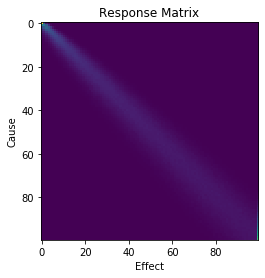

In [4]:
#a)

#Here goes your code


plt.imshow(response_M)
plt.title("Response Matrix")
plt.xlabel("Effect")
plt.ylabel("Cause")
plt.show()

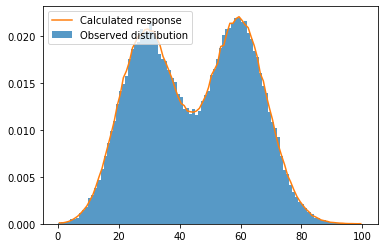

In [5]:
# b)

#Here goes your code. 

#Hint: Think what should be the values of x axis.

# Basic Unfolding

After verifying the validity of equation $  C^T M = E^T $, we may try to restore the original distribution by a simple linear algebra. We should have  

$$ E^T M^{-1} =  C^T M M^{-1} = C^T,$$ 

what means that all we need to solve an unfolding problem is the effect vector $E$ and precise knowledge of response matrix $M$.

As we will soon see, there is a fundamental problem bound with this approach. We do not know the response matrix nor the effect vector **exactly**, and we must rely on (usually MC) approximations. It will be often the case, that small perturbations lead to chaotic and significant changes in $C$. We call such equations **ill posed problems**.

## Ex 2
a) Inverce matrix $M$ and calculate true distribution according to $ E^T M^{-1}  = C,$    
b) Suprising results of the **Ex 2a)** may suggest numerical errors. For obtained solution verify, if it is in fact the solution of equation $ C^T M  = E^T $.

In [ ]:
#a)

#Here goes your code.

#Hint: np.linalg.inv()

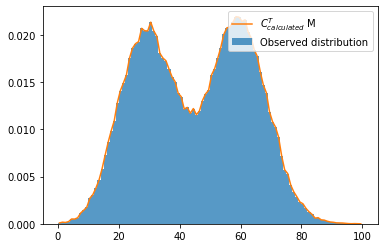

In [7]:
#b)

#Here goes your code.

# Playing with binning
We know now, that solution of the equation $ C^T M  = E^T $ may be nowhere near to the true distribution due to random fluctuations and an ill-posedness of the problem. One of the possible ways to reduce an impact of these limitations is to artificially increase the number of ** effects ** by reducing the width of histogram bins. As the result, response matrix will no longer be square, so that it will be impossible to calculate it's inverse. On the other hand, we still will be able to determine most suitable solution of the equation  $ C^T M  = E^T $ with least square method.

## Ex 3
Solve equation $ C^T M  = E^T $ for number of effects increased (widths of histogram bins decreased) by the factor of:   
a) 1,   
b) 2,    
c) 10,   
d) 30,    
e) 100 (if you have enough memory).    




*Hint:*    

Firstly, generate data using the *get_signal()* function. Then, choose denser binning for effects, that is instead of having 

$$ \dots, [n:n+1), [n+1:n+2), \dots$$ 

you shall have for example $$\dots, [n:n+0.1), [n+0.1:n+0.2), \dots$$ 

Using this binning calculate a histogram of observations. Compute the response matrix combining two binnings (it will be 100 x 1000 matrix in the above case).

Finally, solve the equation $ C^T M  = E^T $ using function *np.linalg.lstsq()*.

Remember, that as the number of effects rise, you may need to use more samples for your analysis.

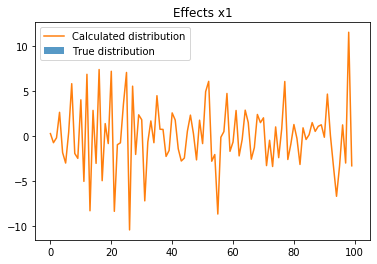

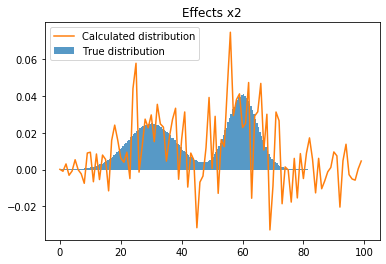

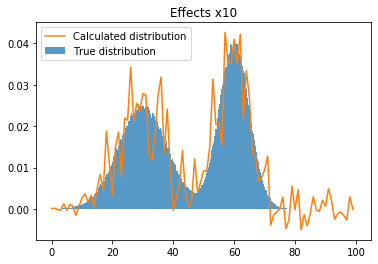

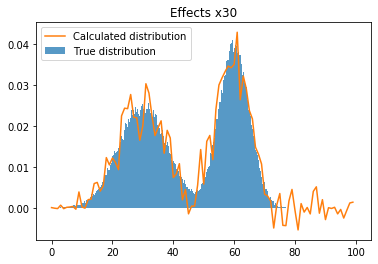

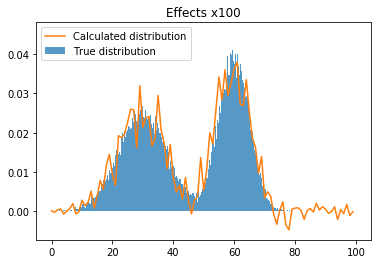

In [8]:
for ratio in [1, 2,10,30,100]:

    #Here goes your code.

# Regularization
As we've seen in the previous exercise, although derived solutions match true distribution quite well, we can still see some defects. In order to smoothen calculated distributions it is common to introduce a regularization in the form of a penalty for unrealistic shape. 

## Ex 4
Take a response matrix for with 3000 effect columns and 100 cause rows (from previous exercise). Append 99 columns of the form:

$$\begin{bmatrix}
    p \\
    -p \\
    0  \\
    0 \\
    \vdots \\
    0
\end{bmatrix},
\begin{bmatrix}
    0 \\
    p \\
    -p  \\
    0 \\
    \vdots \\
    0
\end{bmatrix}
\dots
\begin{bmatrix}
    0 \\
    \vdots \\
    0\\
    p \\
    -p \\
    0  
\end{bmatrix}
\begin{bmatrix}
    0 \\
    \vdots \\
    0\\
    0\\
    p \\
    -p \\
\end{bmatrix}
.$$

Append 99 zeros to the effect vector. Calculate and plot source vector using leastsq() function for p = [0.01, 0.1, 1, 10]. Explain results.

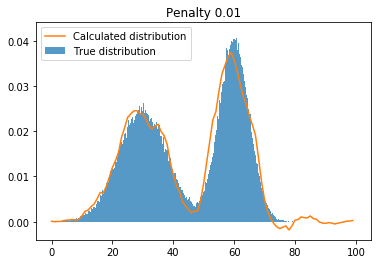

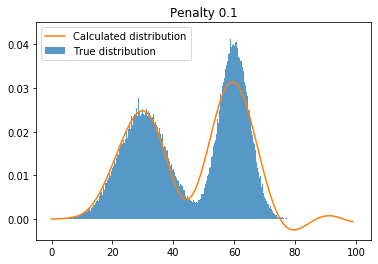

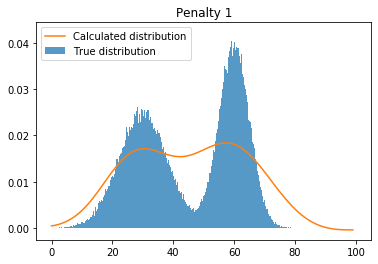

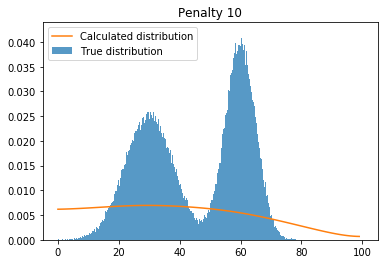

In [9]:
for p in [0.01, 0.1, 1, 10]:
    
    #Here goes your code.

Explanation:   
Extra columns force adjacent points in the distribution to be as equal as possible. Apart from fitting the distribution, we are trying to minimize 99 expressions in the form $p^{2}[P(C_{i}) - P(C_{i+1})]^{2}$ The bigger $p$, the more impact has this extra "smoothness" regularization.

# Bayesian (D'Agostini) unfolding

Another unfolding approach comes from the theory of Bayesian inference. Let $P_{0}(C_{i})$ be our initial knowledge of true distribution. Let's also assume, that we know the response matrix $M$. Then, instead of inversing the response matrix, we can get the probability that cause $C_{i}$ was responsible for effect $E_{j}$ using the Bayes theorem:

$$ P(C_{i} \mid  E_{j}) = \dfrac{P(E_{j} \mid  C_{i}) P_{0}(C_{i})}{\sum_{k=1}^{n}P(E_{j} \mid  C_{k}) P_{0}(C_{k})}.$$

Quick reminder: we read $P(E_{j} \mid  C_{i})$ from the response matrix.

To get the probability of the cause $C_{i}$, that is the original distribution, we just need to use the integral probability formula:

$$ P(C_{i}) = \sum_{j=1}^{m} P(C_{i} \mid  E_{j}) P(E_{j}). $$

Quick reminder: we read $P(E_{j})$ from the observation vector.    
If we now denote tha matrix $M_{ij} = P(C_{i} \mid  E_{j})$ as $M_{B}$, we can write:

$$ C = M_{B} E, $$

where $C$ and $E$ are cause and effect vector, defined as in previous exercises.

As usually in the case of Bayesian methods, the procedure is iterative, with every next step using a result of the previous one as a prior.

More details in the original paper:   
https://lib-extopc.kek.jp/preprints/PDF/1994/9408/9408011.pdf

## Ex 5
Calculate the distribution of $C_{i}$ using a method described above and:   
a) Flat prior,   
b) Prior equal to the observed distribution.   

Compare rms difference between real and calculated distributions. Plot results after the few iterations.

Loss: 0.9657319999999999
Loss: 0.31471495935597427
Loss: 0.1648517892657277
Loss: 0.07981750389988693
Loss: 0.05362148548094371


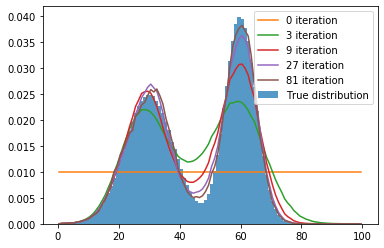

In [10]:
#a) 


#Here goes your code.

Loss: 0.3676331590063602
Loss: 0.21715442388276718
Loss: 0.1354876758929421
Loss: 0.07262983134008812
Loss: 0.052220148103284965


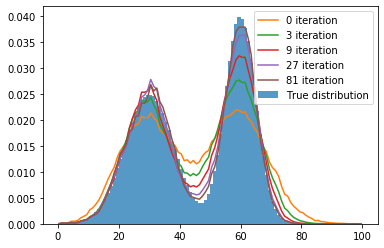

In [11]:
#b)

#Here goes your code.